# Data diri
Nama: Angga Dwi Sunarto

email: anggadwisunarto3@gmail.com

domisili kota: Kabupaten Semarang, Jawa tengah

# Import library yang diperlukan

In [1]:
!pip install mediapipe

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.5/34.5 MB 41.3 MB/s eta 0:00:00


In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib
import mediapipe as mp
import cv2

# import shutil
# from tqdm import tqdm
# import glob

# Proyek Akhir : Klasifikasi Gambar
> Selamat, Anda telah berada di akhir pembelajaran dalam akademi ini. Anda sudah mempelajari dasar-dasar machine learning dan bagaimana jaringan saraf bekerja. Untuk bisa lulus dari akademi ini, Anda harus mengirimkan submission berupa program jaringan saraf tiruan menggunakan TensorFlow. Program Anda harus mampu mengenali bentuk tangan yang membentuk gunting, batu, atau kertas.
>> **Berikut kriteria submission yang harus dipenuhi:**
1. Dataset yang dipakai haruslah dataset berikut : rockpaperscissors, atau
 gunakan link ini pada wget command: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip.
2. Dataset harus dibagi menjadi **train set** dan **validation set**.
3. Ukuran validation set harus **40%** dari total dataset (data training memiliki 1314 sampel, dan data validasi sebanyak 874 sampel).
4. Harus mengimplementasikan **augmentasi gambar**.
5. Menggunakan image **data generator**.
6. Model harus menggunakan **model sequential**.
7. Pelatihan model tidak melebihi **waktu 30 menit**.
8. Program dikerjakan pada **Google Colaboratory**.
9. **Akurasi** dari model minimal **85%**.

## Dataset yang dipakai: rockpaperscissors

In [3]:
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip "/content/rockpaperscissors.zip"

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

## Dataset harus dibagi menjadi train set dan validation set

In [11]:
TRAINING_DIR = "/content/rockpaperscissors/rps-cv-images"

# Define data generator with augmentation for training data
training_datagen = ImageDataGenerator(
    rescale=1./255.,
    rotation_range=40,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.4,
)

# Create a data generator for training data
train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32,
    subset='training',
    color_mode='grayscale'
)

# Create a data generator for validation data
val_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(64, 64),
    class_mode='categorical',
    batch_size=32,
    subset='validation',
    color_mode='grayscale'

)

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


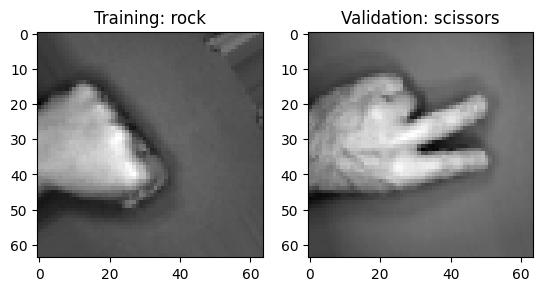

In [12]:
def get_class_name(class_index, generator):
    for class_name, idx in generator.class_indices.items():
        if idx == class_index:
            return class_name
    return None

# Ambil satu batch dari generator pelatihan
train_batch = train_generator.next()

# Ambil satu batch dari generator validasi
val_batch = val_generator.next()

# Plot gambar dari generator pelatihan
plt.subplot(1, 2, 1)
plt.imshow(train_batch[0][0], cmap='gray')
plt.title(f"Training: {get_class_name(np.argmax(train_batch[1][0]), train_generator)}")

# Plot gambar dari generator validasi
plt.subplot(1, 2, 2)
plt.imshow(val_batch[0][0], cmap='gray')
plt.title(f"Validation: {get_class_name(np.argmax(val_batch[1][0]), val_generator)}")

# Tampilkan plot
plt.show()

## Model harus menggunakan model sequential.

In [13]:
model = keras.Sequential([
  tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(64, 64, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2, 2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(512, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
  tf.keras.layers.Dense(3, activation='softmax')
])

optimizer = keras.optimizers.Adam(learning_rate=0.001)

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

## Pelatihan model

In [14]:
filepath= "model_cnn_rockpaperscissors.h5"
checkpoint = keras.callbacks.ModelCheckpoint(
    filepath,
    monitor='val_accuracy',
    verbose=1,
    save_best_only=True,
    mode='max',
    save_weights_only=False
)

history = model.fit(
  train_generator,
  epochs=35,
  steps_per_epoch=train_generator.n // train_generator.batch_size,
  validation_data=val_generator,
  validation_steps=val_generator.n //  val_generator.batch_size,
  callbacks=[checkpoint]
)

Epoch 1/35
41/41 [==============================] - ETA: 0s - loss: 3.6638 - accuracy: 0.3276
Epoch 1: val_accuracy improved from -inf to 0.32755, saving model to model_cnn_rockpaperscissors.h5
41/41 [==============================] - 9s 173ms/step - loss: 3.6638 - accuracy: 0.3276 - val_loss: 1.9482 - val_accuracy: 0.3275


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/35
41/41 [==============================] - ETA: 0s - loss: 1.3805 - accuracy: 0.4431
Epoch 2: val_accuracy improved from 0.32755 to 0.62731, saving model to model_cnn_rockpaperscissors.h5
41/41 [==============================] - 7s 172ms/step - loss: 1.3805 - accuracy: 0.4431 - val_loss: 0.9728 - val_accuracy: 0.6273
Epoch 3/35
41/41 [==============================] - ETA: 0s - loss: 0.8502 - accuracy: 0.6248
Epoch 3: val_accuracy did not improve from 0.62731
41/41 [==============================] - 7s 167ms/step - loss: 0.8502 - accuracy: 0.6248 - val_loss: 0.8476 - val_accuracy: 0.5660
Epoch 4/35
40/41 [============================>.] - ETA: 0s - loss: 0.7217 - accuracy: 0.6625
Epoch 4: val_accuracy improved from 0.62731 to 0.66204, saving model to model_cnn_rockpaperscissors.h5
41/41 [==============================] - 7s 164ms/step - loss: 0.7213 - accuracy: 0.6622 - val_loss: 0.6985 - val_accuracy: 0.6620
Epoch 5/35
41/41 [==============================] - ETA: 0s - loss: 

# Evaluasi

In [15]:
load_model = keras.models.load_model("/content/model_cnn_rockpaperscissors.h5")
load_model.evaluate(val_generator)

28/28 [==============================] - 3s 90ms/step - loss: 0.1209 - accuracy: 0.9737


[0.12090535461902618, 0.9736841917037964]

In [16]:
def plot_loss_curves(model, figsize=(16, 5)):
    loss = model.history['loss']
    val_loss = model.history['val_loss']

    accuracy = model.history['accuracy']
    val_accuracy = model.history['val_accuracy']

    epochs = np.arange(len(loss))

    plt.figure(figsize=figsize)

    plt.subplot(1,2,1)
    plt.plot(epochs, loss, label='loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.legend()

    plt.subplot(1,2,2)
    plt.plot(epochs, accuracy, label='accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.legend()

    plt.show()


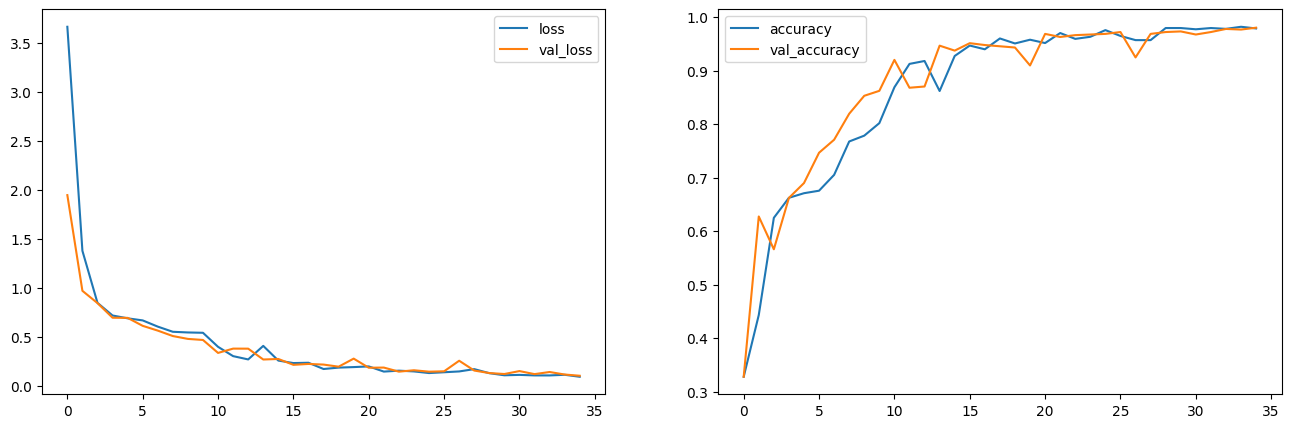

In [17]:
plot_loss_curves(history)

# Prediction

In [159]:
def load_and_prep_image(path, max_num_hands=1, static_image_mode=True,
                           min_detection_confidence=0.2, min_tracking_confidence=0.2,
                           img_size=64, offset=50, padding=50):
  try:
    mp_drawing = mp.solutions.drawing_utils
    mp_hands = mp.solutions.hands

    detector = mp_hands.Hands(
        max_num_hands=max_num_hands,
        static_image_mode=static_image_mode,
        min_detection_confidence=min_detection_confidence,
        min_tracking_confidence=min_tracking_confidence
    )

    temp_imgs_copy = cv2.imread(path)
    output_images = np.copy(temp_imgs_copy)
    top = bottom = left = right = padding
    output_images = cv2.copyMakeBorder(output_images, top, bottom, left, right, cv2.BORDER_CONSTANT, value=(0, 0, 0))

    results = detector.process(cv2.cvtColor(output_images, cv2.COLOR_BGR2RGB))
    if results.multi_hand_landmarks:
        hand_landmarks = results.multi_hand_landmarks[0]
        points = []
        for data_point in hand_landmarks.landmark:
            points.append([data_point.x * output_images.shape[1], data_point.y * output_images.shape[0]])
        x, y, w, h = cv2.boundingRect(np.array(points).astype('float32'))
        img_crop = output_images[y - offset:y + h + offset, x - offset:x + w + offset]
        if np.any(img_crop):
            img_crop = cv2.resize(img_crop, (img_size, img_size))

    final_result = cv2.cvtColor(img_crop, cv2.COLOR_BGR2GRAY)
    final_result = final_result / 255.0
    final_result = tf.expand_dims(final_result, axis=0)
    final_result = tf.expand_dims(final_result, axis=-1)

    return final_result
  except Exception as e:
    print(e)

In [168]:
val_generator.class_indices

{'paper': 0, 'rock': 1, 'scissors': 2}

1/1 [==============================] - 0s 21ms/step


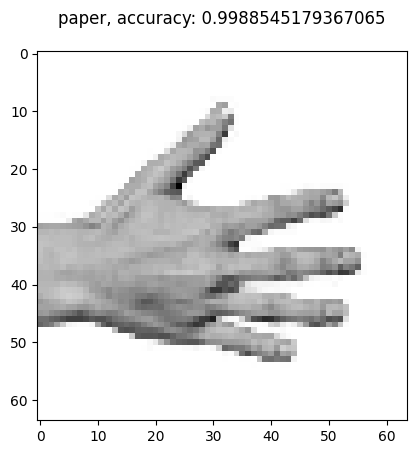

In [167]:
target_labels = ['paper', 'rock', 'scissors']
path = '/content/test 6.jpg'

img_test = load_and_prep_image(path)
y_pred = load_model.predict(img_test)
plt.imshow(img_test[0], cmap='gray')
plt.title(f'{target_labels[np.argmax(y_pred)]}, accuracy: {y_pred[0][np.argmax(y_pred)]}', y=1.05)
plt.show()